#### Imports

In [ ]:
from pptx.util import Pt
from pptx import Presentation
from pptx.dml.color import RGBColor
from pptx.enum.text import MSO_AUTO_SIZE
from pptx.enum.text import MSO_ANCHOR

from PIL import Image
import matplotlib.pyplot as plt

import aspose.pydrawing as draw
import aspose.slides as slides

: 

#### Funcions

In [2]:
def plot_slide(presentation, slide, show=True):

    # Instantiate a Presentation class that represents the presentation file
    with slides.Presentation(presentation) as pres:
        # Access the first slide
        sld = pres.slides[slide]

        # User defined dimension
        desiredX = 210*4
        desiredY = 297*4

        # Getting scaled value  of X and Y
        ScaleX = (1.0 / pres.slide_size.size.width) * desiredX
        ScaleY = (1.0 / pres.slide_size.size.height) * desiredY


        # Create a full scale image
        bmp = sld.get_thumbnail(ScaleX, ScaleY)

        # save the image to disk in JPEG format
        bmp.save("temp.jpg", draw.imaging.ImageFormat.jpeg)
    
        fig, ax = plt.subplots(figsize=(21/2,29.7/2))
        plt.imshow(plt.imread("temp.jpg"))
        plt.axis("off")
        if show: 
            plt.show()
        return ax

#### Reading data

In [ ]:
dir_xavi = r"C:\Users\xavim\Desktop\Uni\3er\2\Syntesis/"
dir_maria = r"C:\Users\Maria\OneDrive - UAB\Documentos\3r de IA\Synthesis project II\Github/"

dir2DS = "Project_Synthesis2-/Datasets/DocTR_output/"
file2open = "Bank account statements/Estado de cuenta completo BBVA_0.txt"

try: 
    dir2Main = dir_xavi
    with open(dir_xavi+dir2DS+file2open, 'r', encoding = "utf8") as file:
        raw_data = file.readlines()
except:
    dir2Main = dir_maria
    with open(dir_maria+dir2DS+file2open, 'r', encoding = "utf8") as file:
        raw_data = file.readlines()
raw_data[:5]

In [11]:
data = [item.strip("[]\n").split(", ") for item in raw_data]

for sublist in data:
    for i, item in enumerate(sublist):
        if item.isdigit():
            sublist[i] = int(item)
        elif item.replace('.', '', 1).isdigit():  # Check for floating point number
            sublist[i] = float(item)
        else:
            sublist[i] = item.strip("'")  # Remove single quotes from strings

print(data[:5])

[[1020, 6, 1092, 29, 'Estado', 0.9949026107788086, 17], [1092, 5, 1124, 31, 'de', 0.99998939037323, 19], [1124, 6, 1200, 29, 'Cuenta', 0.8463806509971619, 17], [920, 39, 999, 57, 'Libreton', 0.9874507188796997, 13], [1002, 36, 1064, 59, 'Basico', 0.6583079695701599, 17]]


In [4]:
file_name, page = file2open.split("_")
page = page[:-4] # to remove .txt

img = Image.open(f"{dir2Main}/Project_Synthesis2-/Sample documents - PNG/{file_name}/{page}.png")
width, height = img.size

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Maria\\OneDrive - UAB\\Documentos\\3r de IA\\Synthesis project II\\Github//Project_Synthesis2-/Sample documents - PNG/Bank account statements/Estado de cuenta completo BBVA/0.png'

#### Tests

In [5]:
def add_text_in_bounding_boxes(presentation, slide_index, text, coordinates):
    slide = presentation.slides[slide_index]
    left, top, width, height = coordinates
    txBox = slide.shapes.add_textbox(left, top, width, height)
    tf = txBox.text_frame
    # tf.word_wrap = True
    tf.paragraphs[0].font.size = Pt(10)
    tf.paragraphs[0].text = text
    tf.vertical_anchor = MSO_ANCHOR.MIDDLE
    tf.auto_size = MSO_AUTO_SIZE.SHAPE_TO_FIT_TEXT

In [6]:
presentation = Presentation("template.pptx")

for words in data:
    coordinates = Pt(words[0] / 2.4), Pt(words[1] / 2.4), Pt((words[2] - words[0])), Pt((words[3] - words[1]))
    text = words[4]
    add_text_in_bounding_boxes(presentation, 0, text, coordinates)
    
presentation.save("predefined_layout.pptx")

NameError: name 'data' is not defined

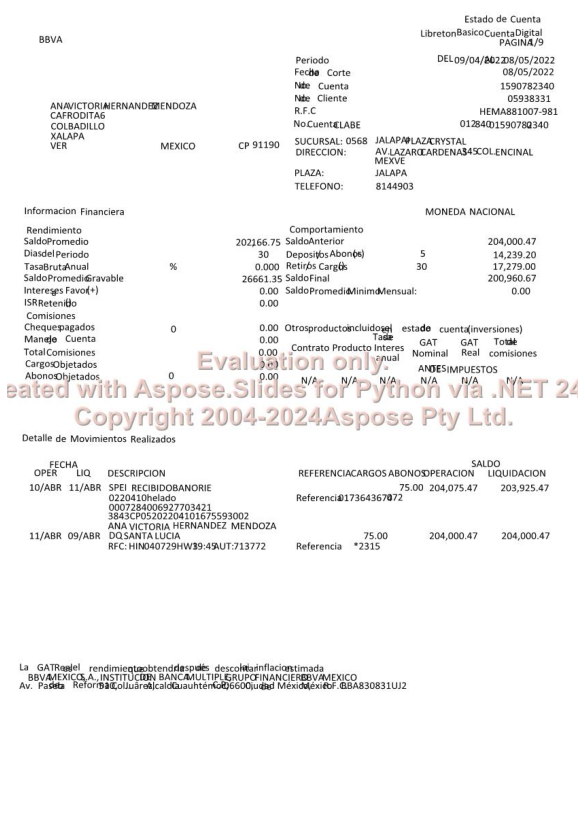

<Axes: >

In [76]:
plot_slide("predefined_layout.pptx", 0)

## Printing per line

In [7]:
import json

In [23]:
folder

['/hhome/ps2g07/document_analysis/github/']

In [30]:
dir_xavi = r"C:\Users\xavim\Desktop\Uni\3er\2\Syntesis/"
dir_maria = r"C:\Users\Maria\OneDrive - UAB\Documentos\3r de IA\Synthesis project II\Github/"
dir_cluster = '/hhome/ps2g07/document_analysis/github/'
import os

dir2DS = "Project_Synthesis2-/Datasets/DocTR_output/"
file2open = "Bank account statements/Estado de cuenta completo BBVA_0"

folder = list(filter(lambda x: os.path.exists(x), [dir_xavi, dir_maria, dir_cluster]))[0]

with open(folder+dir2DS+file2open+".json", 'r', encoding = "utf8") as file:
    raw_data = json.load(file)

#try: 
#    dir2Main = dir_xavi
#    with open(dir_xavi+dir2DS+file2open+".json", 'r', encoding = "utf8") as file:
#        raw_data = json.load(file)
#except:
#    dir2Main = dir_maria
#    with open(dir_maria+dir2DS+file2open+".json", 'r', encoding = "utf8") as file:
#        raw_data = json.load(file)
raw_data

{'page_idx': 0,
 'dimensions': [1584, 1224],
 'orientation': {'value': None, 'confidence': None},
 'language': {'value': None, 'confidence': None},
 'blocks': [{'geometry': [[0.8336397058823529, 0.0029296875],
    [0.9802389705882353, 0.01953125]],
   'lines': [{'geometry': [[0.8336397058823529, 0.0029296875],
      [0.9802389705882353, 0.01953125]],
     'words': [{'value': 'Estado',
       'confidence': 0.9949026107788086,
       'geometry': [[0.8336397058823529, 0.00390625],
        [0.8917738970588236, 0.0185546875]]},
      {'value': 'de',
       'confidence': 0.99998939037323,
       'geometry': [[0.8917738970588236, 0.0029296875],
        [0.9183134191176471, 0.01953125]]},
      {'value': 'Cuenta',
       'confidence': 0.8463806509971619,
       'geometry': [[0.9183134191176471, 0.00390625],
        [0.9802389705882353, 0.0185546875]]}]}],
   'artefacts': []},
  {'geometry': [[0.7514935661764706, 0.0224609375],
    [0.9789751838235294, 0.0771484375]],
   'lines': [{'geometry': 

In [12]:
# structure of data: pages - blocks - lines - words
print("pages info", raw_data.keys())
print("blocks info", raw_data["blocks"][0].keys())
print("lines info", raw_data["blocks"][0]["lines"][0].keys())
print("word info", raw_data["blocks"][0]["lines"][0]["words"][0].keys())

pages info dict_keys(['page_idx', 'dimensions', 'orientation', 'language', 'blocks'])
blocks info dict_keys(['geometry', 'lines', 'artefacts'])
lines info dict_keys(['geometry', 'words'])
word info dict_keys(['value', 'confidence', 'geometry'])


In [13]:
mean_linesxBlock = []
for b in raw_data["blocks"]:
    mean_linesxBlock.append(len(b["lines"]))
    
sum(mean_linesxBlock)/len(mean_linesxBlock)

2.4186046511627906

In [14]:
raw_data["blocks"][0]["lines"][0]

{'geometry': [[0.8336397058823529, 0.0029296875],
  [0.9802389705882353, 0.01953125]],
 'words': [{'value': 'Estado',
   'confidence': 0.9949026107788086,
   'geometry': [[0.8336397058823529, 0.00390625],
    [0.8917738970588236, 0.0185546875]]},
  {'value': 'de',
   'confidence': 0.99998939037323,
   'geometry': [[0.8917738970588236, 0.0029296875],
    [0.9183134191176471, 0.01953125]]},
  {'value': 'Cuenta',
   'confidence': 0.8463806509971619,
   'geometry': [[0.9183134191176471, 0.00390625],
    [0.9802389705882353, 0.0185546875]]}]}

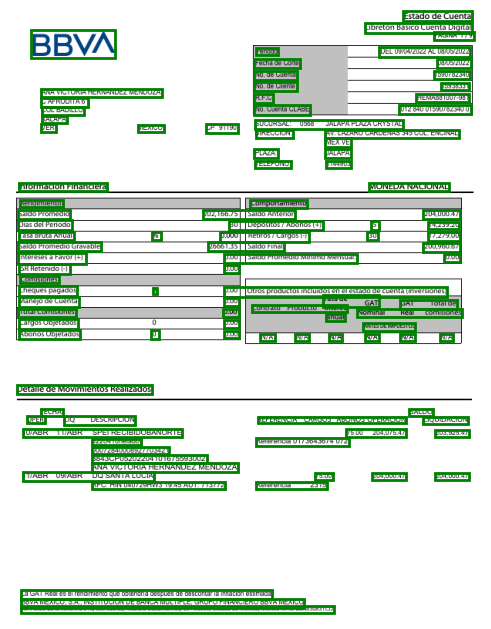

In [31]:
#using mlp plot the image with the bounding boxes
import matplotlib.pyplot as plt
from PIL import Image

file, page = file2open.split("_")

img = Image.open(f"{folder}/Project_Synthesis2-/Sample documents - PNG/{file}/{page}.png")
width, height = img.size

def plot_bounding_boxes(img, data):
    fig, ax = plt.subplots(figsize=(width/100, height/100))
    ax.imshow(img)
    for block in data["blocks"]:
        for line in block["lines"]:
            [x1, y1], [x2, y2] = line["geometry"]
            x1 = x1*width
            y1 = y1*height
            x2 = x2*width
            y2 = y2*height
            rect = plt.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=2, edgecolor='g', facecolor='none')
            ax.add_patch(rect)
            
            # for word in line["words"]:
            #     [x1, y1], [x2, y2] = word["geometry"]
            #     x1 = x1*width
            #     y1 = y1*height
            #     x2 = x2*width
            #     y2 = y2*height
            #     rect = plt.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor='r', facecolor='none')
            #     ax.add_patch(rect)

    plt.axis("off")
    plt.show()
    
plot_bounding_boxes(img, raw_data)

In [32]:
def add_line_in_bounding_boxes(presentation, slide_index, text, coordinates):
    slide = presentation.slides[slide_index]
    left, top, width, height = coordinates
    txBox = slide.shapes.add_textbox(left, top, width, height)
    tf = txBox.text_frame
    # tf.word_wrap = True
    # print(0.75*coordinates[3])
    tf.paragraphs[0].font.size = Pt(int(0.000075*coordinates[3]))
    tf.paragraphs[0].text = text
    tf.vertical_anchor = MSO_ANCHOR.MIDDLE
    tf.auto_size = MSO_AUTO_SIZE.SHAPE_TO_FIT_TEXT

In [33]:
from pptx.util import Pt
from pptx import Presentation

In [34]:
presentation = Presentation("template.pptx")

pixels_per_inch = 70  # Standard resolution for screens
new_width = int(width * 914400 / pixels_per_inch)
new_height = int(height * 914400/ pixels_per_inch)

# Resize the slide layout
presentation.slide_width = new_width
presentation.slide_height = new_height

for block in raw_data["blocks"]:
    for line in block["lines"]:
        [x1, y1], [x2, y2] = line["geometry"]
        x1, x2 = x1*width, x2*width
        y1, y2 = y1*height, y2*height
        
        text = " ".join([word["value"] for word in line["words"]])
        
        add_line_in_bounding_boxes(presentation, 0, text, [Pt(x1), Pt(y1), Pt(x2-x1), Pt(y2-y1)])
    
presentation.save("predefined_layout.pptx")

In [35]:
plot_slide("predefined_layout.pptx", 0)

NameError: name 'slides' is not defined